### Collecting data from Excel after projecting onto Fundamental region
First we have projected each and every Euler angle to the fundamental region and saved it into the adjusted data. Note that the crystal lattice has M-3M symmetry.

Now let us import the data in the adjusted_data sheet into a variable df using pandas.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'file.xlsx' with the path to your Excel file
file_path = '/Users/Jayee/Downloads/Nanoindentation data-selected/Berkovich Nanoindentation Strain rates of E-2 E-1 and E0 per second/Strain rate of E0 ps.xlsx'

# Read Excel file into a DataFrame, handling any blank spaces as NaN
# Use the 'usecols' parameter to specify the range of columns to read
df = pd.read_excel(file_path,sheet_name = "adjusted_data" , na_values=' ', usecols='A:D')  # Assuming columns A to Z contain data

# Drop rows with any missing values
df.dropna(inplace=True)

# Print the DataFrame
print(df)


          phi1        Phi       phi2  Hardness
0    70.009610  63.772599  36.012142  5.601675
1    70.205799  65.684727  37.076950  5.574661
2   116.071209  78.967448  10.211639  5.620957
3    49.497680  57.138467  56.927508  4.900000
4    50.023263  57.033994  57.924733  5.500000
..         ...        ...        ...       ...
65   90.380066  86.259388  40.487228  6.426607
66    0.659260  54.129789  63.374411  5.671592
67   20.898894  89.483015  34.616621  6.772578
68  102.469691  58.197302  26.883539  6.640766
69    8.361710  80.249151  79.807213  8.185540

[70 rows x 4 columns]


### Step2: saving our data as an array.
Lets save all our data as an array called data.

In [86]:
import numpy as np
data = df.values
data = np.array(data)
n_data = data.shape[0]
print(f"n_data = ", n_data)

n_data =  70


### Step3: Segregating training and test data.
We have n_data = 79. Now out of 79 let us train 69 data points using GPR and the rest 10 let us put it as test data. But we will first select the data at random.

In [87]:
import random
random.seed(0)

n_test = 10
n_train = n_data-n_test

random_numbers = random.sample(range(n_data), n_data)
data_train = data[random_numbers[0:n_train],:]
data_test = data[random_numbers[n_train:],:]

### Step4: Segregating the X and Y data
We have a 2d array with the first 3 columns representing the euler angles and the 4th column representing the hardness. so lets seperate them as x and y respectively


In [88]:
x_train = data_train[:,0:-1]
y_train = data_train[:,-1]

x_test = data_test[:,0:-1]
y_test = data_test[:,-1]

### Step4: Scaling the x_train and x_test


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Step5: Perfoming GPR

In [92]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import WhiteKernel,RBF

ls = [1,1,1]
lsb = [1e-2,1e30]
kernel = 1* RBF(length_scale = ls, length_scale_bounds=lsb)+ WhiteKernel(
    noise_level=0.1, noise_level_bounds=(1e-4, 1e1))

#kernel = 1* RBF(length_scale = ls, length_scale_bounds=lsb)

gp = GPR(kernel=kernel,n_restarts_optimizer=10,random_state=1)
gp.max_iter_predict = 1000

gp.fit(x_train_scaled,y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1]) + WhiteKernel(noise_level=0.1),
                         n_restarts_optimizer=10, random_state=1)

In [93]:
gp.kernel_

5.24**2 * RBF(length_scale=[9.65e+28, 1.07e+08, 1.43e+20]) + WhiteKernel(noise_level=0.455)

In [94]:
y_train_mean_pred,y_train_std_pred = gp.predict(x_train_scaled,return_std=True)

### Step Last: Understanding the data
Now as Prof. Pan suggested let us understand the data by plotting the training across the three Euler angles.

#### Step last a: phi1 vs Hardness

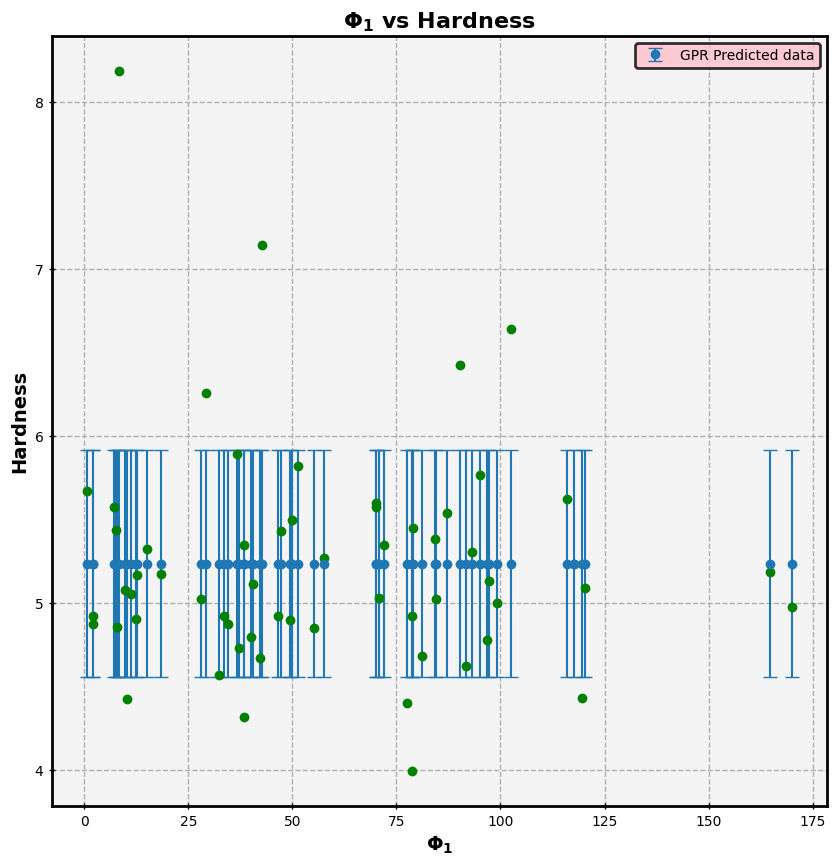

In [95]:

fig,axs = plt.subplots(1,1,figsize=(10,10))
axs.set_title("$\mathbf{\Phi_1}$ vs Hardness",fontweight="bold", fontsize=16)

axs.set_xlabel("$\mathbf{\Phi_1}$", fontweight="bold",fontsize=14)
axs.set_ylabel("Hardness",fontweight="bold",fontsize=14)
axs.errorbar(x_train[:,0], y_train_mean_pred, yerr=y_train_std_pred, fmt='o', capsize=5, label='GPR Predicted data')
axs.plot(x_train[:,0],y_train,"go")


axs.grid("on",linestyle="--",linewidth=1)

#axs[(axs_num)].axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs.spines[spine_value].set_linewidth(2)
axs.tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)
plt.savefig("data_e0_phi1_Hardness.pdf")
plt.show()


In [96]:
#### Step last a: phi vs Hardness

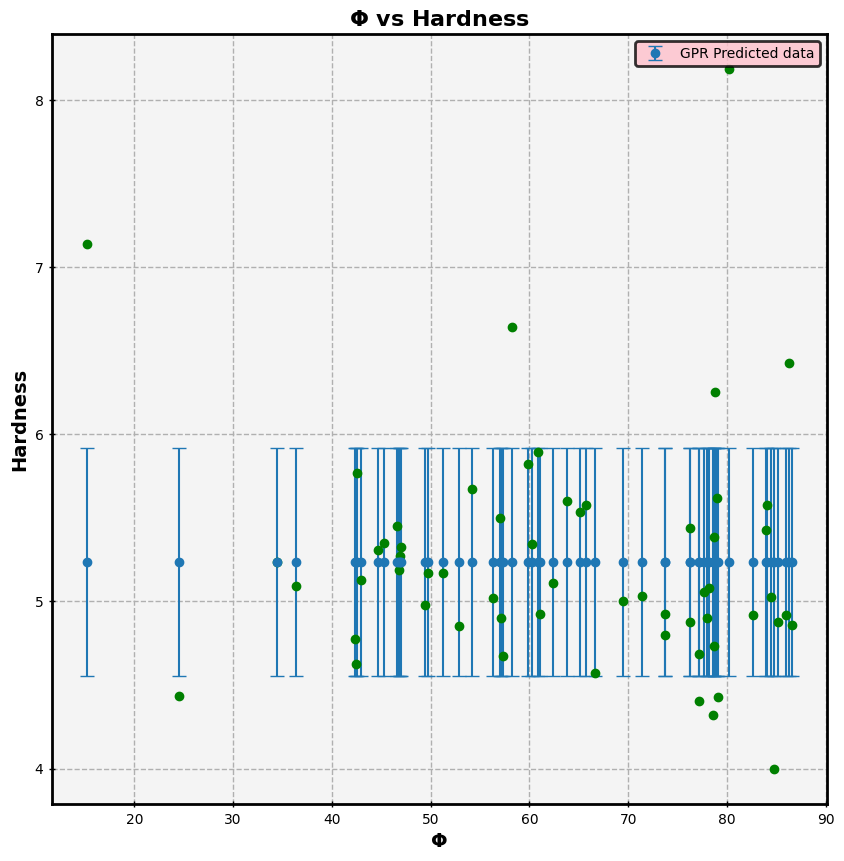

In [97]:

fig,axs = plt.subplots(1,1,figsize=(10,10))
axs.set_title("$\mathbf{\Phi}$ vs Hardness",fontweight="bold", fontsize=16)

axs.set_xlabel("$\mathbf{\Phi}$", fontweight="bold",fontsize=14)
axs.set_ylabel("Hardness",fontweight="bold",fontsize=14)
axs.errorbar(x_train[:,1], y_train_mean_pred, yerr=y_train_std_pred, fmt='o', capsize=5, label='GPR Predicted data')
axs.plot(x_train[:,1],y_train,"go")


axs.grid("on",linestyle="--",linewidth=1)

#axs[(axs_num)].axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs.spines[spine_value].set_linewidth(2)
axs.tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)
plt.savefig("data_e0_phi_Hardness.pdf")
plt.show()


In [98]:
#### Step last a: phi2 vs Hardness

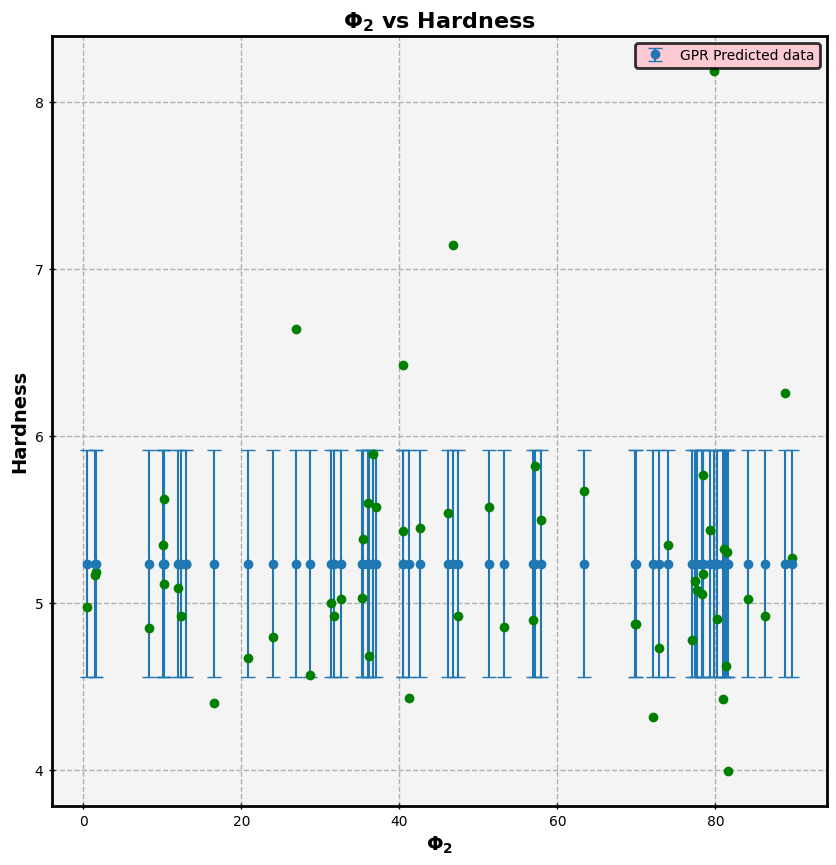

In [99]:

fig,axs = plt.subplots(1,1,figsize=(10,10))
axs.set_title("$\mathbf{\Phi_2}$ vs Hardness",fontweight="bold", fontsize=16)

axs.set_xlabel("$\mathbf{\Phi_2}$", fontweight="bold",fontsize=14)
axs.set_ylabel("Hardness",fontweight="bold",fontsize=14)
axs.errorbar(x_train[:,2], y_train_mean_pred, yerr=y_train_std_pred, fmt='o', capsize=5, label='GPR Predicted data')
axs.plot(x_train[:,2],y_train,"go")


axs.grid("on",linestyle="--",linewidth=1)

#axs[(axs_num)].axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs.spines[spine_value].set_linewidth(2)
axs.tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)
plt.savefig("data_e0_phi2_Hardness.pdf")
plt.show()


In [30]:
y_mean_pred,y_std_pred = gp.predict(x_test_scaled,return_std=True)

In [25]:
_ = [min(y_mean_pred),max(y_mean_pred), min(y_test),max(y_test),min(y_train),max(y_train)]
temp1 = [min(_),max(_)]
temp2 = [min(_),max(_)]

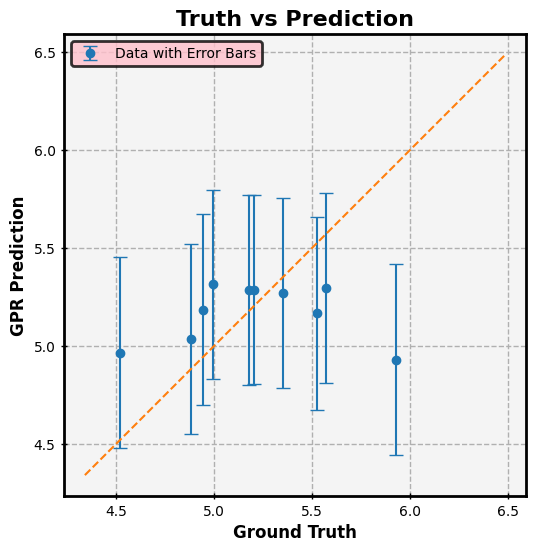

In [26]:
#plotting the curves
fig,axs = plt.subplots(1,1,figsize=(6,6))
axs.set_title("Truth vs Prediction",fontweight="bold", fontsize=16)

axs.set_xlabel("Ground Truth", fontweight="bold",fontsize=12)
axs.set_ylabel("GPR Prediction",fontweight="bold",fontsize=12)
axs.errorbar(y_test, y_mean_pred, yerr=y_std_pred, fmt='o', capsize=5, label='Data with Error Bars')
axs.plot(temp1,temp1,"--")



axs.grid("on",linestyle="--",linewidth=1)
axs.set_aspect("equal")
#axs[(axs_num)].axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs.spines[spine_value].set_linewidth(2)
axs.tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)
#plt.savefig("not_squared_e-1.pdf")
plt.show()


### Step6
Now we see that the prediction is not so good. Because of this I would like to make the Y values more sensitive to change. So I plan to rescale the y values.

We will define two functions. 
1. takes input, applies min max scaler and squares it.
2. Convers the scaled to the original form.

#### Step6a
Creating a square function and the inverse function.

In [27]:
def my_sq_func(y,scaler):
    y_scaled = y.reshape(-1,1)
    y_scaled = scaler.transform(y_scaled)
    y_scaled = y_scaled**2
    return y_scaled

def my_inv_sq_func(y_scaled, min_y_train, max_y_train):
    y_unscaled = np.sqrt(y_scaled)*(max_y_train - min_y_train)+min_y_train
    return y_unscaled

# scaling and squaring y
y_scaler = MinMaxScaler()
y_train_scaled = y_train.reshape(-1,1)
y_scaler.fit(y_train_scaled)
y_train_scaled = my_sq_func(y_train,y_scaler)

#### Step6b
Let us apply GPR to the scaled y and see if the predictions get better.

In [28]:
ls = [1,1,1]
lsb = [1e-2,1e9]
kernel_y_scaled = 1* RBF(length_scale = ls, length_scale_bounds=lsb)+ WhiteKernel(
    noise_level=0.1, noise_level_bounds=(1e-2, 1e1))

#kernel_y_scaled = 1* RBF(length_scale = ls, length_scale_bounds=lsb)

gp_y_scaled = GPR(kernel=kernel_y_scaled,n_restarts_optimizer=10,random_state=1)
gp_y_scaled.max_iter_predict = 1000

gp_y_scaled.fit(x_train_scaled,y_train_scaled)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1]) + WhiteKernel(noise_level=0.1),
                         n_restarts_optimizer=10, random_state=1)

In [29]:
gp_y_scaled.kernel_

0.191**2 * RBF(length_scale=[3.56e+05, 1.52e+07, 0.293]) + WhiteKernel(noise_level=0.0457)

In [550]:
y_scaled_mean_pred,y_scaled_std_pred = gp_y_scaled.predict(x_test_scaled,return_std=True)

In [551]:
y_unscaled_mean_pred = my_inv_sq_func(y_scaled_mean_pred, min(y_train), max(y_train))
y_unscaled_std_pred = np.sqrt(y_scaled_std_pred)

In [552]:
_ = [min(y_mean_pred),max(y_mean_pred), min(y_test),max(y_test),min(y_train),max(y_train)]
temp1 = [min(_),max(_)]
temp2 = [min(_),max(_)]

In [553]:
y_mean_pred

array([4.92997537, 5.31578162, 4.9659814 , 5.28806252, 5.18657374,
       5.03758158, 5.16711473, 5.29578428, 5.28646752, 5.27058844])

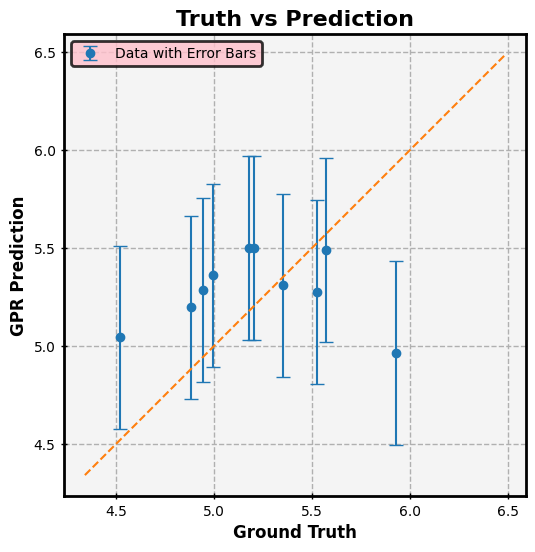

In [554]:
#plotting the curves
fig,axs = plt.subplots(1,1,figsize=(6,6))
axs.set_title("Truth vs Prediction",fontweight="bold", fontsize=16)

axs.set_xlabel("Ground Truth", fontweight="bold",fontsize=12)
axs.set_ylabel("GPR Prediction",fontweight="bold",fontsize=12)
axs.errorbar(y_test, y_unscaled_mean_pred, yerr=y_unscaled_std_pred, fmt='o', capsize=5, label='Data with Error Bars')
axs.plot(temp1,temp1,"--")



axs.grid("on",linestyle="--",linewidth=1)
axs.set_aspect("equal")
#axs[(axs_num)].axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs.spines[spine_value].set_linewidth(2)
axs.tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)
#plt.savefig("squared_e-1.pdf")
plt.show()

# Rough work


In [109]:
ls = [1e-9,1e-4,1e1]
lsb = [1e-10,1e5]
kernel = 1* RBF(length_scale = ls, length_scale_bounds=lsb)+ WhiteKernel(
    noise_level=0.01, noise_level_bounds=(1e-9, 1e4))

#kernel = 1* RBF(length_scale = ls, length_scale_bounds=lsb)

gp = GPR(kernel=kernel,n_restarts_optimizer=10,random_state=1)
gp.max_iter_predict = 1000

gp.fit(x_train_scaled,y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1e-09, 0.0001, 10]) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=10, random_state=1)

In [110]:
gp.kernel_

0.00997**2 * RBF(length_scale=[0.000207, 2.34e+04, 0.00995]) + WhiteKernel(noise_level=27)

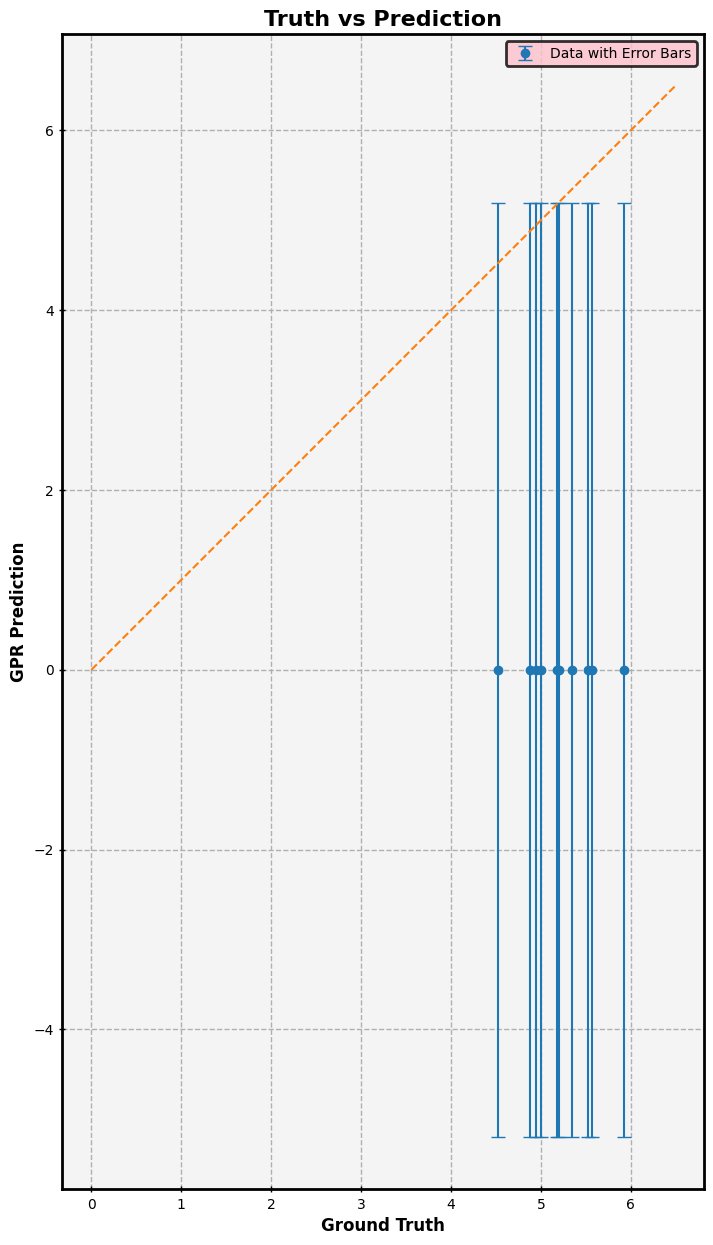

In [111]:
y_mean_pred,y_std_pred = gp.predict(x_test_scaled,return_std=True)
_ = [min(y_mean_pred),max(y_mean_pred), min(y_test),max(y_test),min(y_train),max(y_train)]
temp1 = [min(_),max(_)]
temp2 = [min(_),max(_)]
#plotting the curves
fig,axs = plt.subplots(1,1,figsize=(15,15))
axs.set_title("Truth vs Prediction",fontweight="bold", fontsize=16)

axs.set_xlabel("Ground Truth", fontweight="bold",fontsize=12)
axs.set_ylabel("GPR Prediction",fontweight="bold",fontsize=12)
axs.errorbar(y_test, y_mean_pred, yerr=y_std_pred, fmt='o', capsize=5, label='Data with Error Bars')
axs.plot(temp1,temp1,"--")



axs.grid("on",linestyle="--",linewidth=1)
axs.set_aspect("equal")
#axs[(axs_num)].axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs.spines[spine_value].set_linewidth(2)
axs.tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)
#plt.savefig("not_squared_e-1.pdf")
plt.show()


1. Trajectory of the data
    How many data points, where etc.
2.  Why GPR doesnt work? Why NN not work?
3. 